## Qualitative approach
In this Jupyter Notebook, we will solve scalar autonomous differential equations of the form dx/dt=f(x) using a qualitative approach. The next cell loads several Python modules and defines the main function `apply_qualitative_theory`, which plots the right-hand side of the ODE, takes mouse input to set initial conditions, and compute the resulting solutions. To proceed, click twice on the run button (the triangle in the top menubar) to run the current and the next cell.

In [1]:
%matplotlib widget
from math import *
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def apply_qualitative_theory(f, tmax, xmin, xmax, Ngrid=20):     
    xplot = np.arange(xmin, xmax, (xmax-xmin)/1000)
    fplot = f(xplot)
    
    def rhs(t, x): return f(x)

    def cross_bottom(t, x): return x[0]-xmin+1
    cross_bottom.terminal = True
    
    def cross_top(t, x): return x[0]-xmax-1
    cross_top.terminal = True
    
    fig, ax = plt.subplots(1, 2, figsize=(6, 3.5))
    ax[0].set_title("Graph of f(x)")
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('f(x)')
    ax[0].axhline(y=0, c='grey', linewidth=0.5)
    ax[0].set_xlim(xmin, xmax)
    ax[1].set_title("Solutions as functions of time")
    ax[1].set_xlabel('time t')
    ax[1].set_ylabel('x')
    ax[1].set_xlim(-tmax, tmax)
    ax[1].set_ylim(xmin, xmax)
    ax[1].axvline(x=0, c='grey', linewidth=0.5)
    ax[0].plot(xplot, fplot, color='tab:green')
    plt.tight_layout()
    plt.show()

    def solve_ode(t, x):
        tf = np.linspace(t,  tmax, 100)
        tb = np.linspace(t, -tmax, 100) 
        solf = solve_ivp(rhs, [t, tmax], [x], t_eval=tf, events=[cross_bottom, cross_top], atol=1.e-8, rtol=1.e-6)
        solb = solve_ivp(rhs, [t,-tmax], [x], t_eval=tb, events=[cross_bottom, cross_top], atol=1.e-8, rtol=1.e-6)
        ax[0].plot(solf.y[0], solf.y[0]*0, color='tab:blue')
        ax[0].plot(solb.y[0], solb.y[0]*0, color='tab:blue')
        ax[1].plot(solf.t, solf.y[0], color='tab:blue', alpha=0.8)
        ax[1].plot(solb.t, solb.y[0], color='tab:blue', alpha=0.8)
        plt.show()

    def on_click(event):
        global toggle, labels
        if event.button is MouseButton.LEFT:
            if event.inaxes == ax[0]:
                x = event.xdata
                if x>xmin and x<xmax:
                    equilibrium = fsolve(lambda x: f(x), x)
                    ax[0].scatter(equilibrium, 0, c='tab:red', s=50, marker='o')
                    ax[1].axhline(y=equilibrium, c='tab:red')
            elif event.inaxes == ax[1]:
                t = event.xdata
                x = event.ydata
                if x>xmin and x<xmax: solve_ode(t, x)
        fig.canvas.draw()
    
    plt.connect('button_press_event', on_click)


The following cell defines the right-hand side `f(x)=x(x-0.5)(1-x)` of our differential equation. Click again twice on the run button to execute this and the next cell. The code will create two figures side by side.
- The left figure shows the graph of f(x). If you click close to a root of f(x) in the left figure, the code will compute the equilibrium and plot it.
- The right figure shows solution graphs. Position your mouse anywhere in the right figure: if you click on the figure, the code will compute and plot the solution that starts at the (t,x) location of your mouse. Try it out a few times to see what happens when you click at different points in the right figure!

<IPython.core.display.Javascript object>


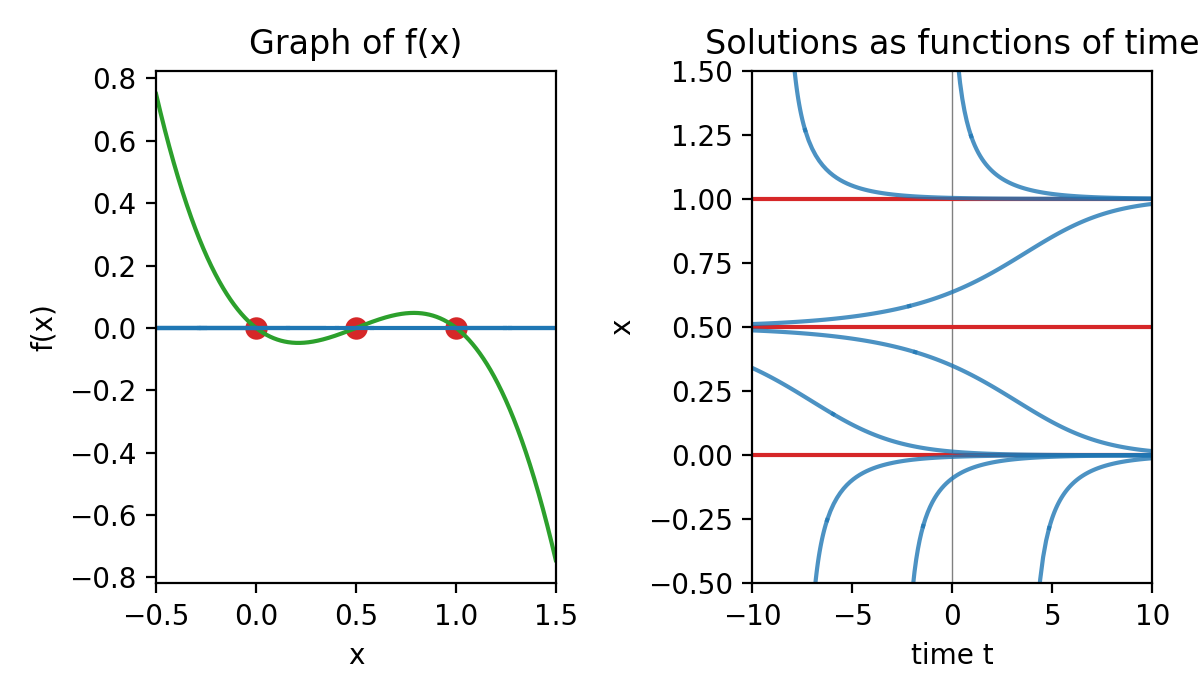

In [2]:
def f(x):
    return x*(x-0.5)*(1-x)

apply_qualitative_theory(f, tmax=10, xmin=-0.5, xmax=1.5)

You can go back to the previous cell (click on the gray area containing the `def f(x):` statement) and edit the expression for f(x) or the values `xmin`, `xmax`, `tmax`, which are, respectively, the minimum and maximum values used for the x variables and the maximum value for the time t that our solver will use. You can edit the expression for f that we use:
- Make sure that you use `**` for exponents (so `x**3` means x<sup>3</sup>). If you want to use trigonometric functions, use `np.sin(x)` or `np.cos(x)` for the sine or cosine functions.
- The code is written in Python. Python uses indentation to separate elements of the code, and you can see that the `return x*(x-0.5)*(x-1)` statement in the definition of f(x) is indented: you need to leave this statement indented or the code will result in an error.

If your code no longer works, try to undo the last edits (see the "Edit" menu om the ipper left corner) in the cells in which you made changes or, if this fails, upload the original Jupyter notebook again.